In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 버젼 2. tensorflow 라면 아래 코드 필요
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.2.0'

In [3]:
w_number = 6
p_number = 6
x_number = 100

In [4]:
y1 = 1
y2 = 1
y1prime = 0
y2prime = 0
x = tf.Variable(tf.random_uniform([x_number]), name = 'x')
for i in range(1, w_number + 1):
    globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'w{}'.format(i))
    globals()['p{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'p{}'.format(i))
    y1 += globals()['w{}'.format(i)]*(x**i)  # y1 = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
    y2 += globals()['p{}'.format(i)]*(x**i)  # y2 = 1 + p1*(x) + p2*(x**2) + p3*(x**3) + p4*(x**4) + p5*(x**5) + p6*(x**6)
    y1prime += i*globals()['w{}'.format(i)]*(x**(i-1))  # y1prime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    y2prime += i*globals()['p{}'.format(i)]*(x**(i-1))  # y2prime = q1 + 2*p2*x + 3*p3*(x**2) + 4*p4*(x**3) + 5*p5*(x**4) + 6*p6*(x**5)

In [10]:
a = np.array([[y1],
              [y2]])
b = np.array([[1,0],
              [0,1]])
c = np.array([[y1prime],
              [y2prime]])
# ((b@c-a)[0] + (b@c-a)[1])[0]
(np.dot(b,a) - c)[0] + (np.dot(b,a -c)[1])

array([<tf.Tensor 'pow_24:0' shape=(100,) dtype=float32>], dtype=object)

In [11]:
cost = tf.reduce_mean(tf.square(((b@a-c)[0] + (b@a-c)[1])[0]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30001):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, y1prime_val, y1_val, y2prime_val, y2_val, x_val, _ = sess.run([cost, y1prime, y1, y2prime, y2, x, train])
    if step % 1000 == 0:
#         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
        print(step, "Cost: ", cost_val, "\n")
        print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")

0 Cost:  1.153384 

w1:  [array([-0.00016015], dtype=float32)] w2:  [array([2.8007283], dtype=float32)] w3:  [array([-1.4038386], dtype=float32)] w4:  [array([-0.4725582], dtype=float32)] w5:  [array([-0.16700703], dtype=float32)] w6:  [array([-0.30419], dtype=float32)] 

1000 Cost:  0.93460673 

w1:  [array([0.0100827], dtype=float32)] w2:  [array([2.8128798], dtype=float32)] w3:  [array([-1.3903275], dtype=float32)] w4:  [array([-0.45832586], dtype=float32)] w5:  [array([-0.15243796], dtype=float32)] w6:  [array([-0.28952965], dtype=float32)] 

2000 Cost:  0.8089437 

w1:  [array([0.01974601], dtype=float32)] w2:  [array([2.822978], dtype=float32)] w3:  [array([-1.3799262], dtype=float32)] w4:  [array([-0.44798842], dtype=float32)] w5:  [array([-0.14237514], dtype=float32)] w6:  [array([-0.27986872], dtype=float32)] 

3000 Cost:  0.73156786 

w1:  [array([0.02894568], dtype=float32)] w2:  [array([2.8315816], dtype=float32)] w3:  [array([-1.3717703], dtype=float32)] w4:  [array([-0.44

30000 Cost:  0.24441324 

w1:  [array([0.20373555], dtype=float32)] w2:  [array([2.9414184], dtype=float32)] w3:  [array([-1.3075773], dtype=float32)] w4:  [array([-0.41287667], dtype=float32)] w5:  [array([-0.13953929], dtype=float32)] w6:  [array([-0.30579302], dtype=float32)] 



In [13]:
def y(x):
    answer = 1
    for i in range(1, w_number + 1):
        answer += globals()['w{}_val'.format(i)]*(x**i)
    return answer[0]

In [14]:
globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]

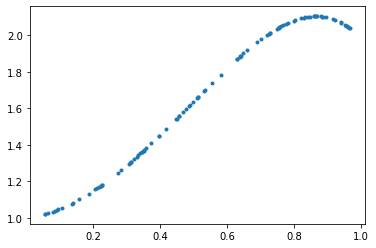

In [15]:
plt.plot(x_val, y(x_val), '.')
plt.show()

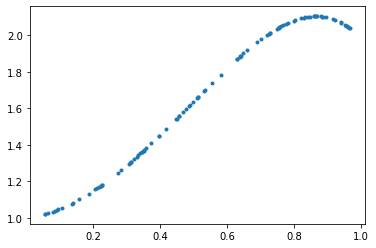

In [16]:
plt.plot(w6x100[0],w6x100[1], '.')
plt.show()